In [12]:
import pandas as pd

df = pd.read_csv("../../../data/preprocessed_data.csv")

Separate between objective and independent variables

In [13]:
x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

Divide the data between train and test data

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

Logistic Regresion Model

In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt


selected_features = []
accuracy_list = []
recall_list = []
f1_list = []

regression_model = LogisticRegression(max_iter=500)

# Evaluate the features chosen
def evaluate_model(features):
    regression_model.fit(x_train.iloc[:, features], y_train)
    predictions = regression_model.predict(x_test.iloc[:, features])
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    return accuracy, recall, f1

# Bucle Forward Selection
while len(selected_features) < x_train.shape[1]:
    best_accuracy = 0
    best_recall = 0
    best_f1 = 0
    best_feature = None
    
    # Iterate over the non-selected features
    for feature_index in range(x_train.shape[1]):
        if feature_index not in selected_features:
            current_features = selected_features + [feature_index]
            accuracy, recall, f1 = evaluate_model(current_features)
            
            # If the new accuracy is better than the last accuracy, updates it
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_recall = recall
                best_f1 = f1
                best_feature = feature_index
    
    # Adds the best feature to the other best ones
    selected_features.append(best_feature)
    accuracy_list.append(best_accuracy)
    recall_list.append(best_recall)
    f1_list.append(best_f1)
    
    # Progress
    print(f"Selected Features: {selected_features}, Accuracy: {best_accuracy:.2f}, Recall: {best_recall:.2f}, F1-Score: {best_f1:.2f}")

Selected Features: [8], Accuracy: 0.69, Recall: 0.80, F1-Score: 0.73
Selected Features: [8, 11], Accuracy: 0.74, Recall: 0.79, F1-Score: 0.76
Selected Features: [8, 11, 7], Accuracy: 0.75, Recall: 0.78, F1-Score: 0.76
Selected Features: [8, 11, 7, 3], Accuracy: 0.76, Recall: 0.78, F1-Score: 0.77
Selected Features: [8, 11, 7, 3, 2], Accuracy: 0.76, Recall: 0.79, F1-Score: 0.77
Selected Features: [8, 11, 7, 3, 2, 6], Accuracy: 0.76, Recall: 0.79, F1-Score: 0.77
Selected Features: [8, 11, 7, 3, 2, 6, 1], Accuracy: 0.76, Recall: 0.79, F1-Score: 0.77
Selected Features: [8, 11, 7, 3, 2, 6, 1, 9], Accuracy: 0.76, Recall: 0.78, F1-Score: 0.77
Selected Features: [8, 11, 7, 3, 2, 6, 1, 9, 0], Accuracy: 0.77, Recall: 0.79, F1-Score: 0.78
Selected Features: [8, 11, 7, 3, 2, 6, 1, 9, 0, 14], Accuracy: 0.77, Recall: 0.79, F1-Score: 0.77
Selected Features: [8, 11, 7, 3, 2, 6, 1, 9, 0, 14, 5], Accuracy: 0.77, Recall: 0.79, F1-Score: 0.78
Selected Features: [8, 11, 7, 3, 2, 6, 1, 9, 0, 14, 5, 13], Accu

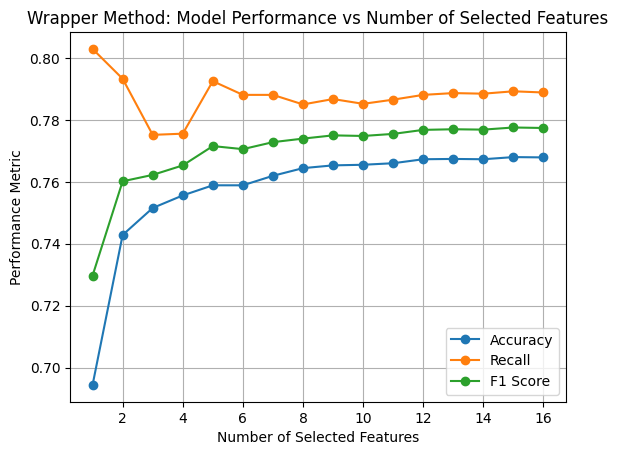

In [16]:
# Plot the results
plt.plot(range(1, len(selected_features) + 1), accuracy_list, marker='o', label='Accuracy')
plt.plot(range(1, len(selected_features) + 1), recall_list, marker='o', label='Recall')
plt.plot(range(1, len(selected_features) + 1), f1_list, marker='o', label='F1 Score')

plt.title('Wrapper Method: Model Performance vs Number of Selected Features')
plt.xlabel('Number of Selected Features')
plt.ylabel('Performance Metric')
plt.legend()
plt.grid(True)
plt.show()